# Air Quality


In [1]:
import pandas as pd

df = pd.read_csv('AirQuality.csv')

print(df.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name     Indicator Code  \
0  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
1  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
2  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
3  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
4  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   

        1990       1991       1992       1993       1994       1995  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN        NaN  ...   
2  64.174097  64.188153  64.210526  64

# Data Cleaning


In [2]:
df = df.drop_duplicates()
df = df.fillna(0)

print(df.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name     Indicator Code  \
0  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
1  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
2  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
3  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
4  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   

        1990       1991       1992       1993       1994       1995  ...  \
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  ...   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  ...   
2  64.174097  64.188153  64.210526  64

# Bar plot


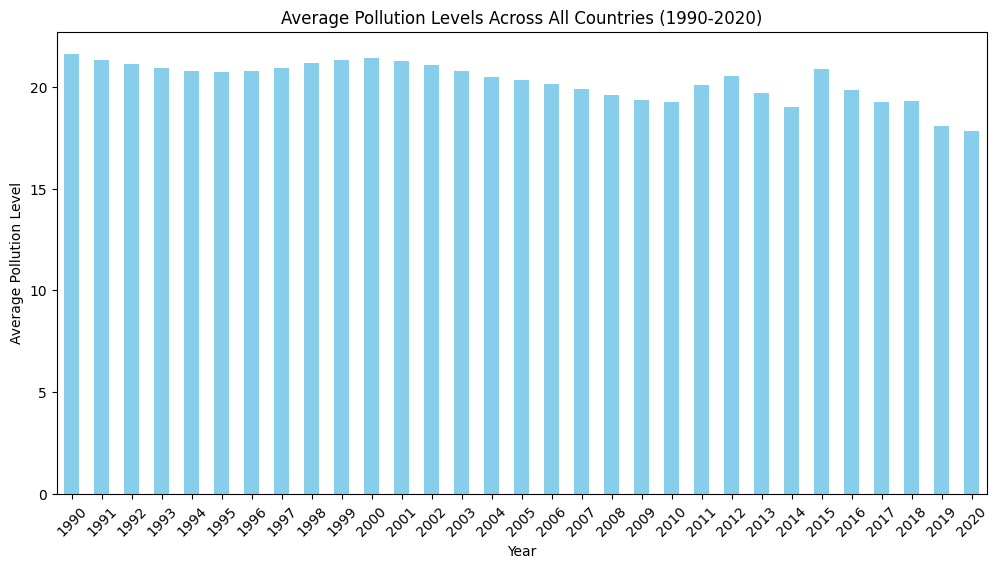

In [3]:
import matplotlib.pyplot as plt
# Calculate average pollution for each year
average_pollution_per_year = df.mean(numeric_only=True)

# Bar Plot
plt.figure(figsize=(12, 6))
average_pollution_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Pollution Levels Across All Countries (1990-2020)')
plt.ylabel('Average Pollution Level')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


# heatmap


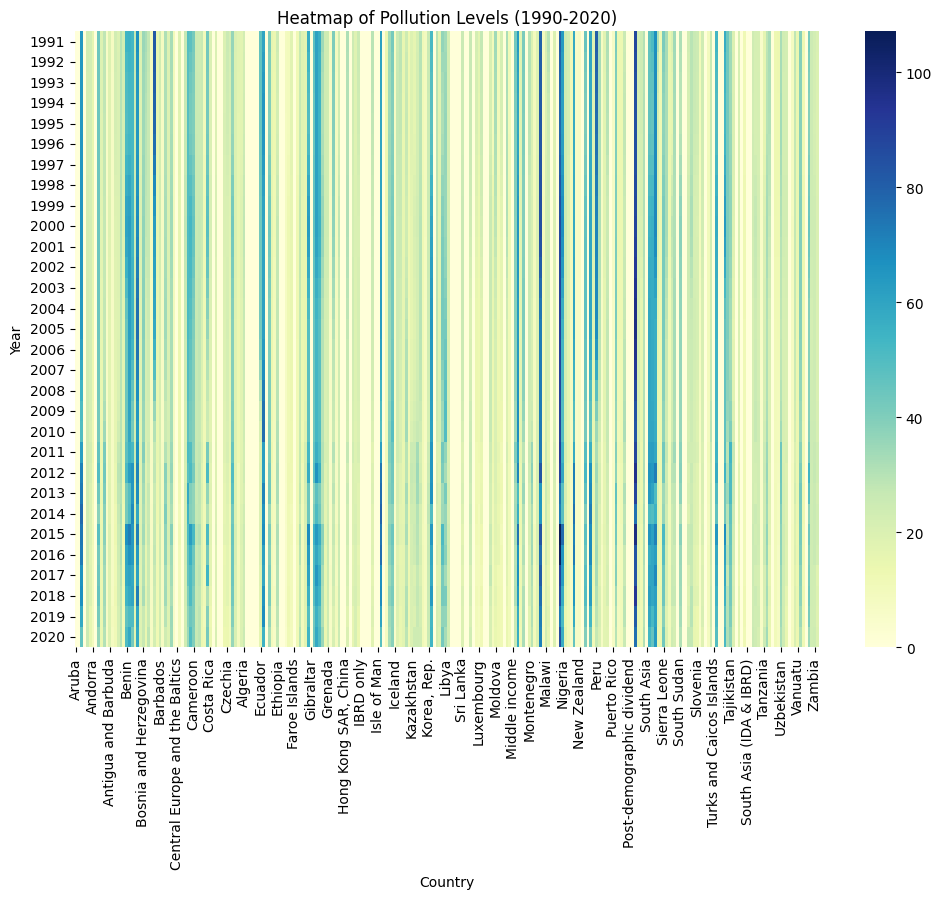

In [4]:
import seaborn as sns

# Prepare data for heatmap
heatmap_data = df.set_index('Country Name').iloc[:, 4:].T  # Exclude non-numeric columns
heatmap_data.columns = df['Country Name']

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Pollution Levels (1990-2020)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()


# line plot


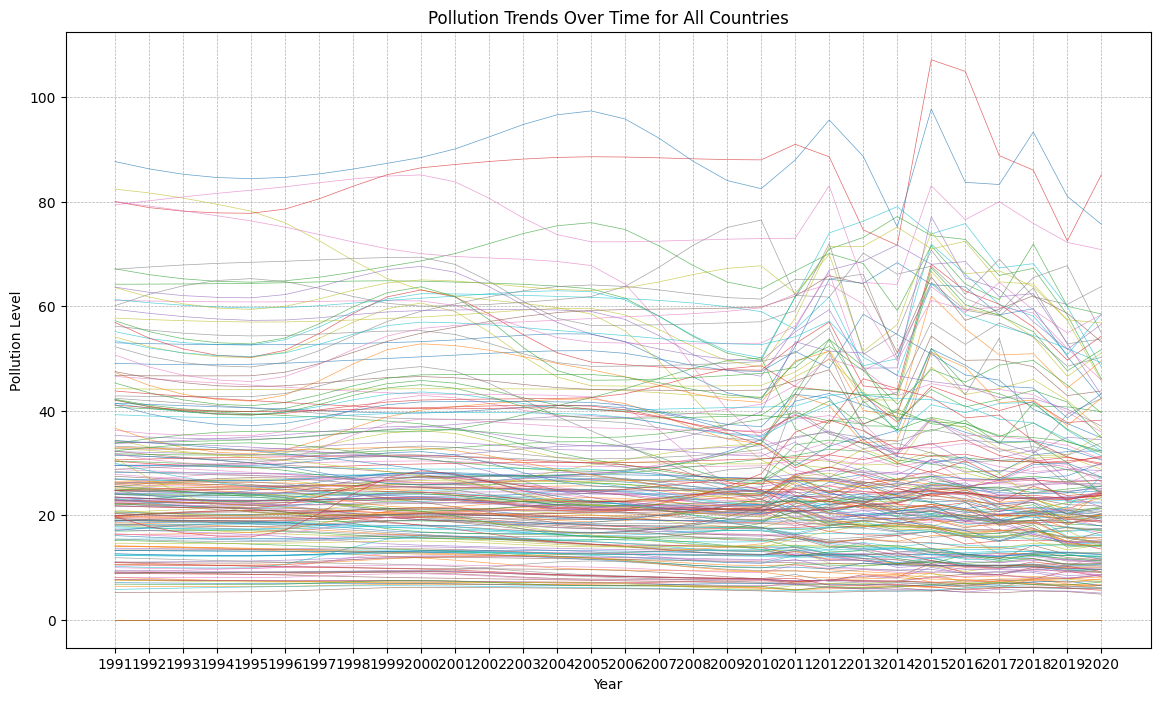

In [5]:

# Prepare the data for line plot
line_data = df.set_index('Country Name').iloc[:, 4:]  # Select only the year columns

# Transpose the data for easier plotting
line_data = line_data.T  # Years as index and countries as columns

# Line Plot for all countries with improved readability
plt.figure(figsize=(14, 8))
for country in line_data.columns:
    plt.plot(line_data.index, line_data[country], linewidth=0.5, alpha=0.7)  # Thinner and semi-transparent lines

plt.title('Pollution Trends Over Time for All Countries')
plt.xlabel('Year')
plt.ylabel('Pollution Level')

# Optional: Adding gridlines for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


# box plot


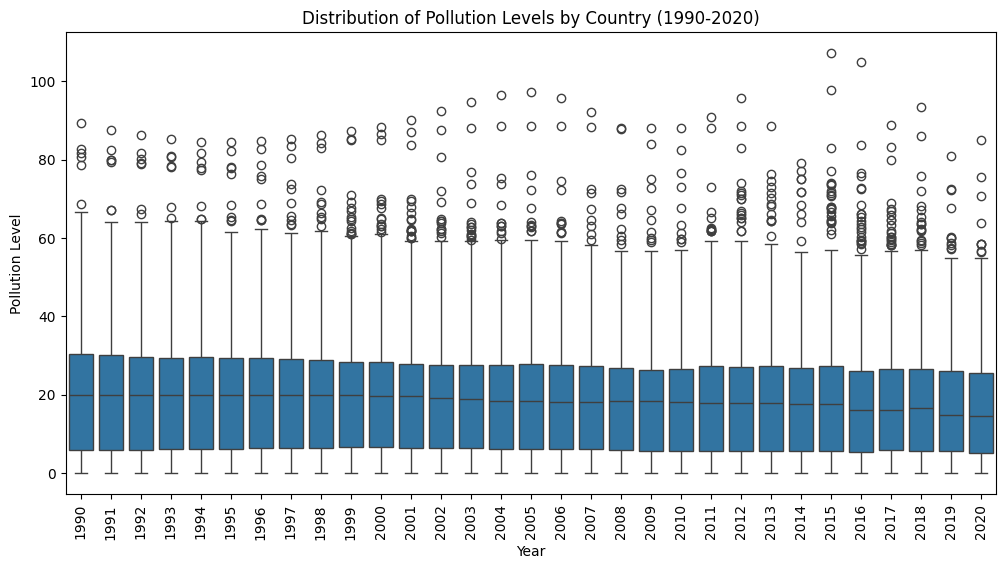

In [6]:
# Prepare data for box plot
melted_data = df.melt(id_vars=['Country Name'], value_vars=[str(year) for year in range(1990, 2021)],var_name='Year', value_name='Pollution Level')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Pollution Level', data=melted_data)
plt.title('Distribution of Pollution Levels by Country (1990-2020)')
plt.xticks(rotation=90)
plt.ylabel('Pollution Level')
plt.show()


In [7]:
# # !jupyter nbconvert --to pdf secondMain.ipynb
# !pip install nbconvert
# !jupyter nbconvert --to html main.ipynb
